In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Vanderbilt Univ Case Dataset.xlsx')

In [3]:
df.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [4]:
df.shape

(241, 19)

## Exploratory Data Analysis

In [5]:
df.describe()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,34.261411,47.240664,64.439834,67.817427,70.502075,72.365145,74.946058,78.041494,82.336100,86.000000,89.269710,92.091286,94.688797,97.373444,101.165975,110.008299,116.381743
std,9.387610,11.321079,13.495891,14.200934,14.873109,14.970786,15.096674,15.054842,15.594841,16.089075,16.911962,17.370472,17.468264,17.589816,17.547004,17.785057,17.629388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,28.000000,41.000000,58.000000,62.000000,64.000000,66.000000,68.000000,71.000000,76.000000,80.000000,82.000000,84.000000,88.000000,91.000000,95.000000,102.000000,110.000000
50%,35.000000,48.000000,65.000000,69.000000,72.000000,74.000000,77.000000,79.000000,85.000000,87.000000,91.000000,94.000000,97.000000,100.000000,103.000000,112.000000,117.000000
75%,40.000000,55.000000,73.000000,76.000000,80.000000,82.000000,84.000000,86.000000,92.000000,95.000000,99.000000,103.000000,106.000000,107.000000,111.000000,119.000000,126.000000
max,57.000000,73.000000,93.000000,99.000000,102.000000,106.000000,106.000000,112.000000,113.000000,118.000000,121.000000,121.000000,124.000000,127.000000,131.000000,139.000000,145.000000


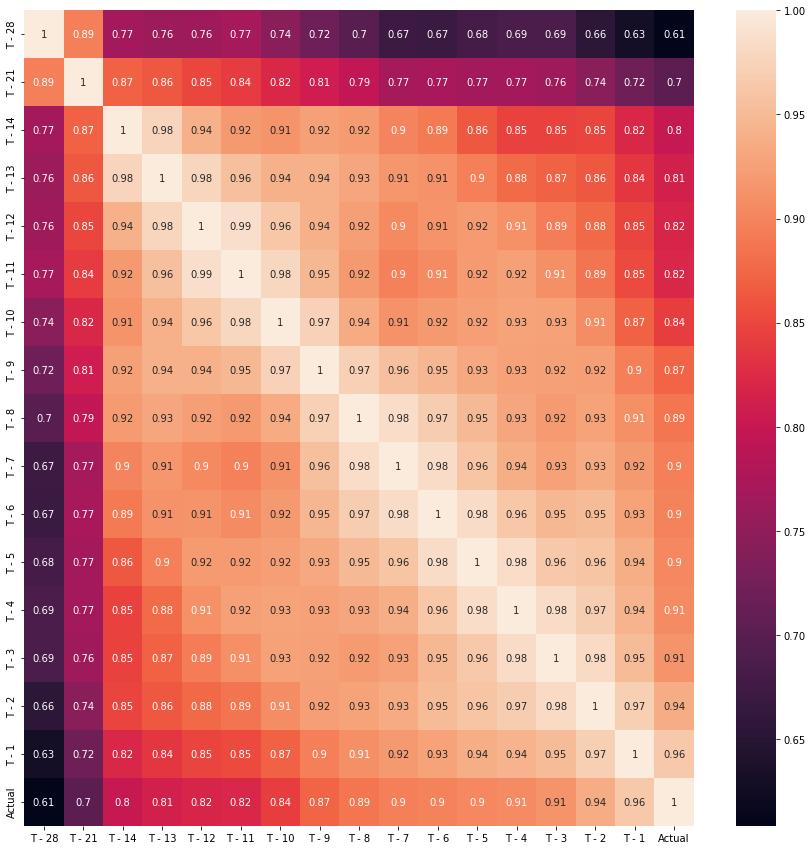

In [108]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.savefig("Dataset_correlation.png", dpi = 300)

### Corr(T-1,Actual)=0.964 
### Corr(T-3,Actual)=0.913
### Corr(T-7,Actual)=0.896
### Corr(T-14,Actual)=0.801
### Corr(T-21,Actual)=0.702
### Corr(T-28,Actual)=0.608

## Average number of surgery cases increases  as we move closer to actual day
## As the gap from surgery day increase, the correlation decreases
## From the correlation matrix, almost all the correlations are significantly high.

In [17]:
df.groupby('DOW')['Actual'].mean()

DOW
Fri    105.612245
Mon    116.255319
Thu    124.083333
Tue    119.081633
Wed    117.041667
Name: Actual, dtype: float64

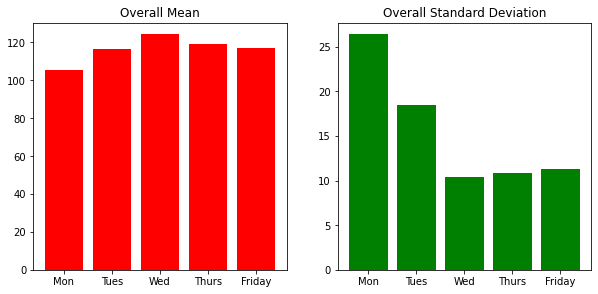

<Figure size 432x288 with 0 Axes>

In [111]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.bar(x=['Mon', 'Tues', 'Wed', 'Thurs', 'Friday'], height = df.groupby('DOW')['Actual'].mean(),color = 'r')
plt.title("Overall Mean")
plt.subplot(2,2,2)
plt.bar(x=['Mon', 'Tues', 'Wed', 'Thurs', 'Friday'], height = df.groupby('DOW')['Actual'].std(), color = 'g')
plt.title("Overall Standard Deviation")
plt.show()
plt.savefig("Mean_SD.jpg")

## Average of actual surgery is 116 with standard deviation of 17.63

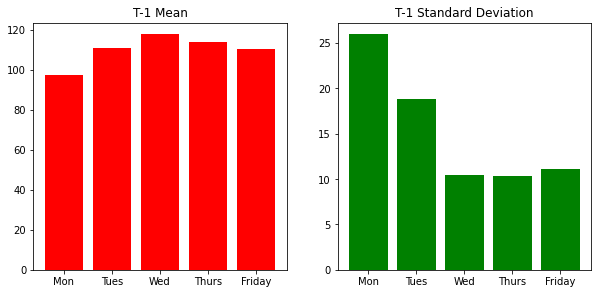

In [35]:
# Validating for T - 1
fig = plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.bar(x=['Mon', 'Tues', 'Wed', 'Thurs', 'Friday'], height = df.groupby('DOW')['T - 1'].mean(),color = 'r')
plt.title("T-1 Mean")
plt.subplot(2,2,2)
plt.bar(x=['Mon', 'Tues', 'Wed', 'Thurs', 'Friday'], height = df.groupby('DOW')['T - 1'].std(), color = 'g')
plt.title("T-1 Standard Deviation")
plt.show()

## Check the value count for each Day of the Week

In [29]:
df['DOW'].value_counts()

Tue    49
Fri    49
Wed    48
Thu    48
Mon    47
Name: DOW, dtype: int64

## Trend of Number of Surgeries performed by Day of Week

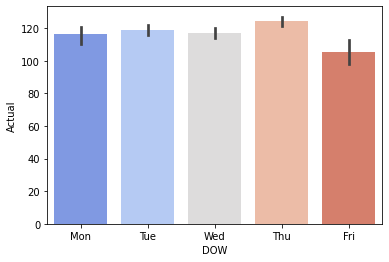

In [112]:
df2 = df[['DOW', 'Actual']]
ax = sns.barplot(x='DOW',y='Actual', data=df, palette='coolwarm')
plt.savefig("Weekly_Distribution.png")

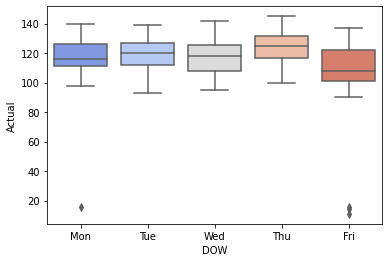

In [113]:
sns.boxplot(x='DOW',y='Actual', data=df, palette='coolwarm')
plt.savefig("Outlier_Detection.png")

## Fridays have lowest number of surgeries which may be indicate surgeon preferences
## Thursdays have lowest number of surgeries
## Alternatively, the high number of surgeries on Thursday might be due to add-on cases 

## Collecting a test sample for Null Hypothesis Testing

In [36]:
test=df.loc[1:242, 'T - 28':'T - 1']

In [37]:
mean = test.mean()
maximum = test.max()
std = test.std()

In [38]:
a = pd.DataFrame(mean)
b = pd.DataFrame(maximum)
c = pd.DataFrame(std)
new = pd.concat([a,b,c], axis = 1)
new.columns = ['Mean', 'Maximum', 'Standard Deviation']
new

,Mean,Maximum,Standard Deviation
T - 28,34.245833,57,9.404107
T - 21,47.250000,73,11.343809
T - 14,64.458333,93,13.521033
T - 13,67.837500,99,14.227186
T - 12,70.525000,102,14.899924
T - 11,72.375000,106,15.001290
T - 10,74.954167,106,15.127699
T - 9,78.062500,112,15.082765
T - 8,82.375000,113,15.615711
T - 7,86.025000,118,16.118008


## ANOVA Testing

## Null Hypothesis: Total surgical case volume does not differ based on the day of week
## Alternative Hypothesis: Total surgical case volume differs based on the day of week

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Actual ~ DOW', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
DOW,8909.054042,4.0,8.002734,0.000005
Residual,65681.825626,236.0,NaN,NaN


## The p value obtained from ANOVA analysis is significant (p < 0.05)
## Therefore, we can conclude that there are significant differences among treatments 
## We reject the null hypothesis and accept alternative hypothesis that total surgical case    volume differ by DOW

## Perform multiple pairwise comparison (Tukey HSD)
## Tukey test results will provide the difference between combination of any two days

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['Actual'], groups=df['DOW'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Fri    Mon  10.6431  0.017   1.2798 20.0063   True
   Fri    Thu  18.4711    0.0   9.1577 27.7844   True
   Fri    Tue  13.4694 0.0008   4.2042 22.7346   True
   Fri    Wed  11.4294 0.0077   2.1161 20.7428   True
   Mon    Thu    7.828 0.1529  -1.5829 17.2389  False
   Mon    Tue   2.8263 0.9212   -6.537 12.1896  False
   Mon    Wed   0.7863 0.9994  -8.6246 10.1972  False
   Thu    Tue  -5.0017 0.5789 -14.3151  4.3117  False
   Thu    Wed  -7.0417 0.2376 -16.4029  2.3196  False
   Tue    Wed    -2.04 0.9747 -11.3533  7.2734  False
-----------------------------------------------------


# Approaches:

Model 1: Linear Regression <br>
Model 2: Time Series (Simple Moving Average)

Dependent variable: Actual Surgery <br>
Independent variables: T - 28 to T - 4 <br><br>
We will not consider last 3 days for our model building: 
1. Business: Stakeholders would want to know scheduled surgery atleast a few days before actual date
2. Technical: Highest correlation with the actual surgery variable (from previous corr EDA)

## Linear Regression

Data Cleaning: Removed outliers to make the dependent variable uniformly distributed

Regression Equation:

x = a1*T-28 + a2*T-21 + ..... + ax*T-1 + ax*DOW

In [41]:
df.columns

Index(['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12',
       'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5',
       'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual'],
      dtype='object')

In [42]:
df1 = df.drop(columns = ['SurgDate', 'DOW'])

In [46]:
df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

<IPython.core.display.Javascript object>

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110,118
237,31,56,68,70,74,78,78,78,78,80,88,94,97,98,98,99,108
238,39,49,69,78,81,82,82,82,85,88,96,99,99,100,104,115,121
239,34,51,68,77,75,75,75,79,89,92,98,99,99,97,101,106,114


In [47]:
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

### Baseline model

In [23]:
# x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8', 
#          'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2']]
# y = df1[['Actual']]

## Predicting using 3 columns

In [114]:
x = df[['T - 3', 'T - 2', 'T - 1']]
y = df[['Actual']]
print(x.shape, y.shape)

(241, 3) (241, 1)


Intercept: 
 [10.96140663]
Coefficients: 
 [[-0.14256711  0.15693554  0.94016588]]


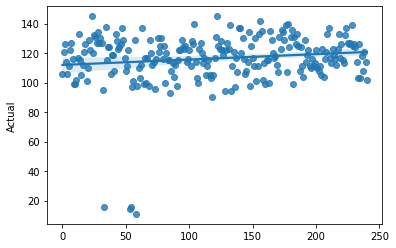

<Figure size 432x288 with 0 Axes>

In [116]:
# 1. With sklearn
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# T-11 strong negative 

sns.regplot(x = np.arange(y.shape[0]), y= y)
plt.savefig("Linear_regression_model.png")
plt.show()

In [117]:
# 2. With statsmodels
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Actual   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.535e+04
Date:                Fri, 31 Mar 2023   Prob (F-statistic):                        0.00
Time:                        20:03:19   Log-Likelihood:                         -725.88
No. Observations:                 241   AIC:                                      1458.
Df Residuals:                     238   BIC:                                      1468.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

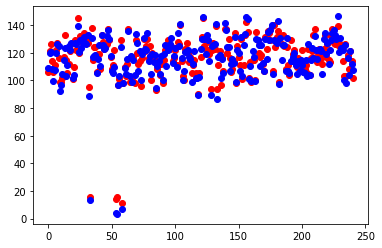

In [119]:
plt.scatter(x = np.arange(y.shape[0]), y=y, c='red')
plt.scatter(x = np.arange(y.shape[0]), y=predictions, c = 'blue')
plt.savefig("Actual_Predicted.png")
plt.show()

## Prediction using 3 columns

In [120]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set
predict = df1.loc[2:242, 'T - 3':'T - 1']
y_pred_test_data=regressorObject.predict(predict)

In [121]:
y_pred_test_data.shape

(235, 1)

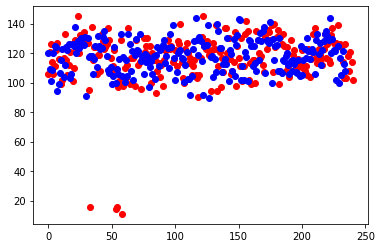

In [122]:
plt.scatter(x = np.arange(y.shape[0]), y=y, c='red')
plt.scatter(x = np.arange(y_pred_test_data.shape[0]), y=y_pred_test_data, c = 'blue')
plt.show()

In [70]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [123]:
result = pd.concat([df, Predicted], ignore_index=True, axis=1)
result.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result['Predicted'] = round(result['Predicted'])

In [124]:
final = result.dropna()
final.tail(10)

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual,Predicted
225,2012-08-23,Thu,41,48,89,98,98,98,100,110,113,117,112,112,113,114,119,129,127,118.0
226,2012-08-24,Fri,29,34,67,67,67,67,75,91,95,104,104,104,108,115,119,126,126,119.0
227,2012-08-27,Mon,40,44,66,69,79,82,85,85,86,92,98,107,109,111,116,123,127,105.0
228,2012-08-28,Tue,34,56,69,84,91,94,94,94,99,103,110,119,124,125,128,139,139,125.0
229,2012-08-29,Wed,36,57,76,81,87,87,87,92,99,101,102,104,103,103,107,114,125,99.0
230,2012-08-30,Thu,29,59,86,88,88,88,97,102,105,106,112,113,113,113,115,124,126,120.0
231,2012-08-31,Fri,19,38,58,58,58,62,68,71,80,86,86,86,94,93,99,116,124,115.0
232,2012-09-04,Tue,23,36,51,57,66,72,73,73,74,80,84,92,105,106,106,116,114,117.0
233,2012-09-05,Wed,27,37,47,54,60,60,60,61,70,70,74,81,81,82,85,95,103,120.0
234,2012-09-06,Thu,23,42,70,80,81,81,87,86,93,99,105,105,105,106,108,119,126,107.0


## Calculating the Root Mean Squared Error

In [125]:
from math import sqrt
from sklearn.metrics import mean_squared_error
error = sqrt(mean_squared_error(final['Actual'], final['Predicted']))
print(error)

19.418679316137304


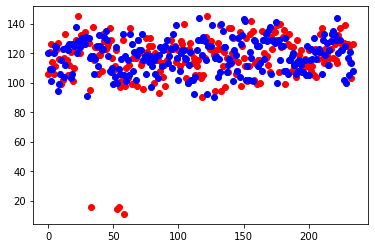

In [127]:
plt.scatter(x = np.arange(y_actual.shape[0]), y=y_actual, c='red')
plt.scatter(x = np.arange(y_predicted.shape[0]), y=y_predicted, c = 'blue')
plt.show()

In [128]:
y = final['Actual']
yhat = final['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 13.970212765957447
MSE: 377.0851063829787
RMSE: 19.418679316137304
R-Squared: -0.19587322731079548


### Predicting results for 3 days before the Surgery Date

In [129]:
x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 
         'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1']]
y = df1[['Actual']]

In [130]:
# 1. With sklearn
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# T-11 strong negative (-0.2075)

Intercept: 
 [14.84638197]
Coefficients: 
 [[-0.03590406  0.0856059  -0.10080439  0.07939623  0.08764874 -0.20750371
   0.03761113  0.10250478  0.00932406  0.12867575 -0.11420405 -0.03460241
   0.06443631 -0.15945052  0.12085577  0.87903786]]


In [131]:
# 2. With statsmodels
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Actual   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              8646.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):                   4.06e-299
Time:                        20:07:36   Log-Likelihood:                         -705.05
No. Observations:                 237   AIC:                                      1442.
Df Residuals:                     221   BIC:                                      1498.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [132]:
#Fitting Simple Linear regression data model
x = df1.loc[2:242, 'T - 28':'T - 4']
y = df1.loc[2:242, 'Actual']
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set as P>|t|
predict = df1.loc[2:242, 'T - 28':'T - 4']
y_pred_test_data=regressorObject.predict(predict)
# print(predict.shape, x.shape, y.shape)

In [133]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [134]:
result2 = pd.concat([df, Predicted], ignore_index=True, axis=1)
result2.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result2['Predicted'] = round(result2['Predicted'])

In [135]:
final2 = result2.dropna()

In [136]:
round(result['Actual'].mean()), round(result2['Predicted'].mean())

# Average Daily Error: ~2 Surgeries

(116, 118)

In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_actual = final2['Actual']
y_predicted = final2['Predicted']
rms = sqrt(mean_squared_error(y_actual, y_predicted))
rms

19.418679316137304

In [138]:
y = final2['Actual']
yhat = final2['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 13.970212765957447
MSE: 377.0851063829787
RMSE: 19.418679316137304
R-Squared: -0.19587322731079548


### Predicting results for 7 days before the surgery date

In [139]:
x = df1[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11', 'T - 10', 'T - 9', 'T - 8']]
y = df1[['Actual']]

In [140]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x,y)

#predict number of surgeries for the data set
predict = df1.loc[2:242, 'T - 28':'T - 8']
y_pred_test_data=regressorObject.predict(predict)

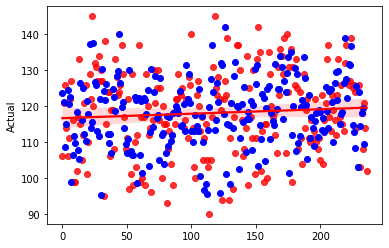

In [141]:
sns.regplot(x = np.arange(y.shape[0]), y=y, color='red')
plt.scatter(x = np.arange(y_pred_test_data.shape[0]), y=y_pred_test_data, c = 'blue')
plt.savefig("Output_selected_col.png")
plt.show()

In [142]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Predicted'])

In [143]:
result3 = pd.concat([df, Predicted], ignore_index=True, axis=1)
result3.columns = ['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',' T - 10', 'T - 9',
                  'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'Predicted']
result3['Predicted'] = round(result3['Predicted'])

In [144]:
final3 = result3.dropna()

In [145]:
round(result['Actual'].mean()), round(final3['Predicted'].mean())

# Average Daily Error: ~2 Surgeries

(116, 118)

In [146]:
y = final3['Actual']
yhat = final3['Predicted']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 13.565957446808511
MSE: 375.6085106382979
RMSE: 19.380622039508893
R-Squared: -0.19119040826349143


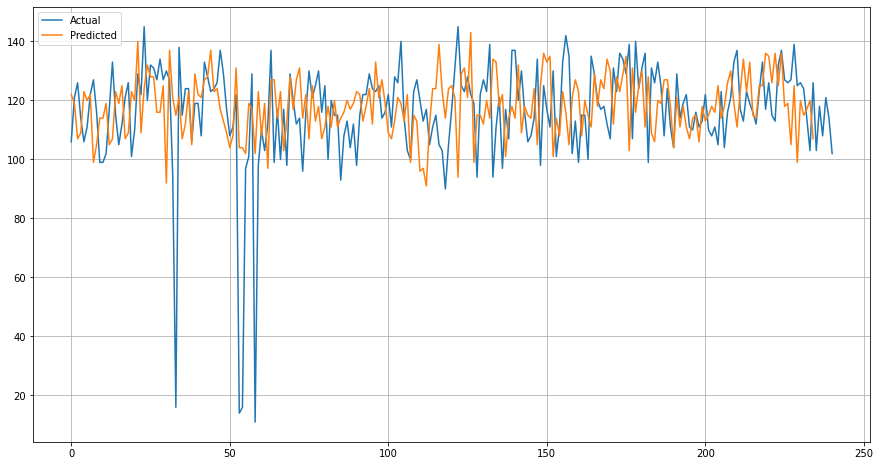

In [147]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(result['Actual'],label='Actual', )
plt.plot(result['Predicted'],label='Predicted')
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)
plt.savefig("Output_lineplot.png")